In [2]:
# Author: James Meehan
# Date: 8/15/2018
# Description: Machine learning model to Predict Week 1 2018 fantasy scores for wide receivers
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
from sklearn import preprocessing

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
# pull in data, separate into data stack, labels, and actual scores
df = pd.read_csv('WRstack2018.csv', sep=',', )
pts_targets = df
labels = df

labels = labels.loc[0:, 'fname':'actual']
labels = labels.values

df = df.loc[0:, 'rating':'retd_2wk']
pts_targets = pts_targets.loc[0:, 'actual']

df = df.values
df.shape

[[ 13.           1.         108.51866491 ...   1.           0.
    0.        ]
 [ 13.           1.         108.51866491 ...   4.         110.
    2.        ]
 [ 15.           0.         187.         ...   5.          71.
    0.        ]
 ...
 [ 16.           1.         143.         ...   6.          90.
    0.25      ]
 [ 28.           1.         113.         ...   6.         100.
    0.        ]
 [ 15.           1.         146.         ...   9.         119.
    1.        ]]


(3108, 25)

In [5]:
# normalize the inputs
scaled_inputs = preprocessing.scale(df)
print(scaled_inputs)

samples_count = scaled_inputs.shape[0]
print (samples_count)
train_samples = int(0.8*samples_count)
test_samples = int(samples_count - train_samples)

train_inputs = scaled_inputs[:train_samples]
train_targets = pts_targets[:train_samples]

test_inputs = scaled_inputs[train_samples:]
test_targets = pts_targets[train_samples:]

[[-9.62276409e-02  1.02608000e+00 -2.89187389e-03 ... -1.27904839e+00
  -1.39794126e+00 -5.80989485e-01]
 [-9.62276409e-02  1.02608000e+00 -2.89187389e-03 ... -6.36320759e-02
   1.42938355e+00  2.89880069e+00]
 [ 1.76900677e-01 -9.74582882e-01  1.76139600e+00 ...  3.41506697e-01
   4.26968388e-01 -5.80989485e-01]
 ...
 [ 3.13464836e-01  1.02608000e+00  7.72260605e-01 ...  7.46645469e-01
   9.15324490e-01 -1.46015713e-01]
 [ 1.95223474e+00  1.02608000e+00  9.78501071e-02 ...  7.46645469e-01
   1.17235402e+00 -5.80989485e-01]
 [ 1.76900677e-01  1.02608000e+00  8.39701655e-01 ...  1.96206179e+00
   1.66071012e+00  1.15890560e+00]]
3108


In [6]:
print("Training set: {}".format(train_inputs.shape))  # 2486 examples, 25 features
print("Testing set:  {}".format(test_inputs.shape))   # 622 examples, 25 features

Training set: (2486, 25)
Testing set:  (622, 25)


In [7]:
# build the neural network. 2 hidden layers with 50 neurons per layer
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(50, activation=tf.nn.relu, 
                       input_shape=(train_inputs.shape[1],)),
   keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])
  #AdamOptimizer
  optimizer = tf.train.AdamOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1300      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 3,901
Trainable params: 3,901
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50

# Store training stats
history = model.fit(train_inputs, train_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


..................................................

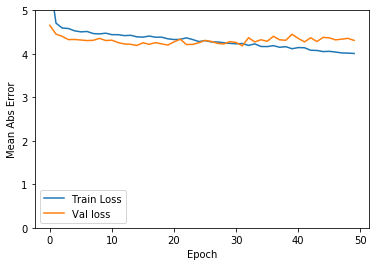

In [10]:
# graph training
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

plot_history(history)

In [11]:
# calculate performance
[loss, mae] = model.evaluate(test_inputs[:-10], test_targets[:-10], verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae))
print("Testing set Mean Squared Error: {:7.2f}".format(loss))

Testing set Mean Abs Error:    4.31
Testing set Mean Squared Error:   31.45


In [12]:
# get predictions
test_predictions = model.predict(test_inputs).flatten()

In [2]:
# graph predicted vs. actual scores
def plot_predict():
  plt.figure()
  plt.title('Wide Receivers: Predicted vs. Actual Scores')
  plt.xlabel('Most Recent 100 Predictions')
  plt.ylabel('Score')
  plt.plot(np.array(test_predictions[410:510]), label = "Predicted Score", color="red")
  plt.plot(np.array(test_targets[410:510]), label = "Actual Score", color="grey")
  plt.legend()
  plt.ylim([0,50])

plot_predict()

NameError: name 'plt' is not defined

In [14]:
# get 2018 predictions
predict2018 = test_predictions[-10:]
WRtest_labels = labels[-10:]

fullList = []

for i in range(0, len(predict2018)):
    mylist = []
    mylist.append(WRtest_labels[i][0])
    mylist.append(WRtest_labels[i][1])
    mylist.append(int(WRtest_labels[i][2]))
    mylist.append(int(WRtest_labels[i][3]))
    mylist.append(0)
    mylist.append(predict2018[i])
    fullList.append(mylist)
print (fullList)

[['Antonio', 'Brown', 1, 2018, 0, 9.077738], ['Julio', 'Jones', 1, 2018, 0, 11.68203], ['DeAndre', 'Hopkins', 1, 2018, 0, 11.650972], ['Keenan', 'Allen', 1, 2018, 0, 9.917954], ['Michael', 'Thomas', 1, 2018, 0, 6.578481], ['Odell', 'Beckham', 1, 2018, 0, 9.556333], ['AJ', 'Green', 1, 2018, 0, 7.4033318], ['Davante', 'Adams', 1, 2018, 0, 9.418545], ['TY', 'Hilton', 1, 2018, 0, 11.333418], ['Larry', 'Fitzgerald', 1, 2018, 0, 8.032779]]


In [15]:
# put predictions in a csv for easy placement into the database
import csv
from pandas import read_csv 

with open("WR2018Output.csv","w",newline="") as newFile: 
    cw = csv.writer(newFile, delimiter=',')
    for i in fullList:
        cw.writerow(i)
        
WRformat = read_csv('WR2018Output.csv', sep=',', names=['fname', 'lname', 'week', 'yr', 'actual', 'predicted'])       
WRformat.to_csv('WR2018Output.csv', index=False)

In [1]:
# setup up database connection
import psycopg2
conn = psycopg2.connect(database="Cepheus_db",
                        user="db_usr",
                        password="B3av3rs1!",
                        host="osucepheus.cgwruhobay1w.us-east-2.rds.amazonaws.com",
                        port="5432")

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [17]:
#Create cursor with which to execute queries
cur = conn.cursor()

In [18]:
#parse csv
with open ('WR2018Output.csv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        #build query string
        query1 = 'INSERT INTO wr_results(fname, lname, week, yr, actual, predicted) VALUES '
        query2 =row['fname'], row['lname'], row['week'], row['yr'], row['actual'], row['predicted']
        query = str(query1) + str(query2)
        print(query)
        #execute query
        cur.execute(query)
#commit change
conn.commit()

INSERT INTO wr_results(fname, lname, week, yr, actual, predicted) VALUES ('Antonio', 'Brown', '1', '2018', '0', '9.077738')
INSERT INTO wr_results(fname, lname, week, yr, actual, predicted) VALUES ('Julio', 'Jones', '1', '2018', '0', '11.682030000000001')
INSERT INTO wr_results(fname, lname, week, yr, actual, predicted) VALUES ('DeAndre', 'Hopkins', '1', '2018', '0', '11.650972')
INSERT INTO wr_results(fname, lname, week, yr, actual, predicted) VALUES ('Keenan', 'Allen', '1', '2018', '0', '9.917954')
INSERT INTO wr_results(fname, lname, week, yr, actual, predicted) VALUES ('Michael', 'Thomas', '1', '2018', '0', '6.578481')
INSERT INTO wr_results(fname, lname, week, yr, actual, predicted) VALUES ('Odell', 'Beckham', '1', '2018', '0', '9.556333')
INSERT INTO wr_results(fname, lname, week, yr, actual, predicted) VALUES ('AJ', 'Green', '1', '2018', '0', '7.4033318')
INSERT INTO wr_results(fname, lname, week, yr, actual, predicted) VALUES ('Davante', 'Adams', '1', '2018', '0', '9.418545')
I